In [5]:
##### 대신증권 연결 확인
import win32com.client

instCpCybos = win32com.client.Dispatch("CpUtil.CpCybos")
print(instCpCybos.IsConnect)
import _Tools 
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic') # For Windows
from datetime import datetime,timedelta
from sklearn.preprocessing import minmax_scale
from statsmodels.tsa.stattools import coint
import time
today = datetime.today().strftime("%Y%m%d") 
# start = (datetime.today() - timedelta(30)).strftime("%Y%m%d") 
# print(start, today)

1


In [8]:
import win32com.client


start = time.time()

def CheckVolumn(instStockChart, code):
    # SetInputValue
    instStockChart.SetInputValue(0, code)
    instStockChart.SetInputValue(1, ord('1'))
    instStockChart.SetInputValue(2,20201222 )
    instStockChart.SetInputValue(3,20191222)
    instStockChart.SetInputValue(4, 60)
    instStockChart.SetInputValue(5, 8)
    instStockChart.SetInputValue(6, ord('D'))
    instStockChart.SetInputValue(9, ord('1'))

    # BlockRequest
    instStockChart.BlockRequest()

    # GetData
    volumes = []
    numData = instStockChart.GetHeaderValue(3)
    for i in range(numData):
        volume = instStockChart.GetDataValue(0, i)
        volumes.append(volume)
    if len(volumes) == 0:
        return 0
    
    # Calculate average volume
    averageVolume = (sum(volumes) - volumes[0]) / (len(volumes) -1)

    if(averageVolume > 1000000 ):
        return 1
    else:
        return 0

# 분 차트 받아오기
def get_min(code,today,start,time):  # 종목, 기간, 오늘, 시점, 분, 시간간격
#     print(start, today)
    instStockChart = win32com.client.Dispatch("CpSysDib.StockChart")
    instStockChart.SetInputValue(0, code )
    instStockChart.SetInputValue(1, ord('1'))
    instStockChart.SetInputValue(2, today)
    instStockChart.SetInputValue(3, start)
    # instStockChart.SetInputValue(4, 1000)
    instStockChart.SetInputValue(5, (0,1,5))
    instStockChart.SetInputValue(6, ord('m'))  # 'D':일 'm' : 분, 'T' : 틱
    instStockChart.SetInputValue(7, time)      # 데이터 주기
    instStockChart.SetInputValue(9, ord('1'))
    instStockChart.SetInputValue(10, 3)

    instStockChart.BlockRequest()

    numData = instStockChart.GetHeaderValue(3)
    numField = instStockChart.GetHeaderValue(1) 

    temp = {}
    for i in range(numData):
        temp[str(instStockChart.GetDataValue(0, i)) +'.'+ str(instStockChart.GetDataValue(1, i))] = [instStockChart.GetDataValue(2, i)]
    temp = pd.DataFrame(temp).transpose()
    temp.index.names = ['time']
    return temp

def merge(temp,data ):
    temp =  pd.merge(left = temp , right = data, how = "inner", on = "time")
    return temp

# 종목명 , 코드 딕셔너리저장

In [6]:
instCpCodeMgr = win32com.client.Dispatch("CpUtil.CpCodeMgr")
codeList = instCpCodeMgr.GetStockListByMarket(1)

code_to_name = {}
name_to_code = {}
for code in codeList:
    name = instCpCodeMgr.CodeToName(code)
    code_to_name[code] = name
    name_to_code[name] = code

### 특정 거래량 이상 종목만 받아오기

In [5]:
instStockChart = win32com.client.Dispatch("CpSysDib.StockChart")
instCpCodeMgr = win32com.client.Dispatch("CpUtil.CpCodeMgr")
codeList = instCpCodeMgr.GetStockListByMarket(1)

buyList = []
buyCode = []

i = 0 ; j= 0
start = time.time()

for code in codeList:        
    j+=1
    if CheckVolumn(instStockChart, code) == 1:
        buyList.append(code)
        buyCode.append(code_to_name[code])
        print(code, code_to_name[code],' ----',j,'/',len(codeList))     
    i+=1
    if  i > 58  and time.time() - start < 15:
        time.sleep( 16 - (time.time() - start))
        start = time.time()
        i=0

A000020 동화약품  ---- 1 / 1578
A000040 KR모터스  ---- 2 / 1578
A000270 기아차  ---- 25 / 1578
A000300 대유플러스  ---- 26 / 1578
A000660 SK하이닉스  ---- 43 / 1578
A000890 보해양조  ---- 57 / 1578
A000910 유니온  ---- 58 / 1578
A000990 DB하이텍  ---- 61 / 1578
A001140 국보  ---- 74 / 1578
A001230 동국제강  ---- 77 / 1578
A001340 백광산업  ---- 83 / 1578
A001360 삼성제약  ---- 84 / 1578
A001380 SG충방  ---- 85 / 1578
A001440 대한전선  ---- 89 / 1578
A001470 삼부토건  ---- 93 / 1578
A001510 SK증권  ---- 95 / 1578
A001520 동양  ---- 97 / 1578
A001740 SK네트웍스  ---- 111 / 1578
A001780 알루코  ---- 116 / 1578
A002070 비비안  ---- 126 / 1578
A002140 고려산업  ---- 128 / 1578
A002360 SH에너지화학  ---- 140 / 1578
A002410 범양건영  ---- 143 / 1578
A002630 오리엔트바이오  ---- 149 / 1578
A002700 신일전자  ---- 151 / 1578
A002710 TCC스틸  ---- 152 / 1578
A002720 국제약품  ---- 153 / 1578
A002760 보락  ---- 154 / 1578
A002870 신풍제지  ---- 164 / 1578
A002900 동양물산  ---- 166 / 1578
A003000 부광약품  ---- 171 / 1578
A003060 에이프로젠제약  ---- 174 / 1578
A003090 대웅  ---- 178 / 1578
A003280 흥아해운  ---- 185 /

### 해당 종목 과거 데이터 받아오기

In [9]:
buyDict = {}
buyName= []

for code in ['A364690','A365040'] : #buyList
    buyName.append(code_to_name[code])
    buyDict[code] = [np.log(get_min(code,20201222,20191222,1))]

com_error: (-2147352567, '예외가 발생했습니다.', (0, None, 'DibRq 통신요청 실패하였습니다. 다시 요청하십시오.(RQID:-2)', None, 0, -2147467259), None)

### 하나의 데이터프레임으로 저장하기

In [136]:
data = pd.DataFrame(buyDict[buyList[0]][0])
buyCode = buyList

for code in buyList[1:] :
    temp = buyDict[code][0]
    if  len(merge(data,temp)) < 6600 or int(temp.isnull().sum()) > 0:
        buyCode.remove(code)  
        buyName.remove(code_to_name[code])
        continue        
    data = merge(data,temp)

data.columns = buyName
data

data.to_pickle('data_coint_pairs.xlsx')

# - 공적분 분석

In [7]:
from cointegration_analysis import estimate_long_run_short_run_relationships, engle_granger_two_step_cointegration_test
market_data = pd.read_pickle('data_coint_pairs.xlsx')
market_data = market_data.iloc[::-1]

In [8]:
market_data

,동화약품,기아차,SK하이닉스,DB하이텍,동국제강,삼부토건,SK증권,대한항공,영진약품,현대제철,...,LG전자,KODEX 200,하나금융지주,KB금융,KODEX 레버리지,KODEX 코스닥150 레버리지,KODEX 코스닥150선물인버스,KODEX 200선물인버스2X,HDC현대산업개발,우리금융지주
time,,,,,,,,,,,,,,,,,,,,,
20201127.1214,9.890909,10.975071,11.496796,10.505068,8.937218,8.567886,6.716595,10.138560,9.003316,10.405777,...,11.374812,10.465956,10.477288,10.769537,9.837348,9.501143,8.522181,8.078688,9.928180,9.225229
20201127.1215,9.890909,10.975071,11.496796,10.503697,8.937218,8.564077,6.717805,10.140534,9.003316,10.407289,...,11.374812,10.465671,10.477288,10.769537,9.836813,9.501516,8.522181,8.078688,9.928180,9.230143
20201127.1216,9.888374,10.976782,11.498827,10.505068,8.935904,8.565983,6.716595,10.138560,9.003316,10.407289,...,11.374812,10.465671,10.478695,10.769537,9.836546,9.500769,8.521185,8.078688,9.928180,9.230143
20201127.1217,9.888374,10.975071,11.497812,10.505068,8.937218,8.564077,6.716595,10.138560,9.002085,10.405777,...,11.375960,10.465671,10.478695,10.768485,9.836546,9.500020,8.522181,8.080237,9.928180,9.225229
20201127.1218,9.888374,10.975071,11.496796,10.505068,8.935904,8.562167,6.716595,10.140534,9.002085,10.405777,...,11.374812,10.465101,10.478695,10.768485,9.835744,9.498522,8.523175,8.080237,9.928180,9.225229
20201127.1219,9.888374,10.976782,11.496796,10.505068,8.934587,8.562167,6.720220,10.138560,9.000853,10.407289,...,11.375960,10.464959,10.478695,10.768485,9.835209,9.497022,8.524169,8.080237,9.928180,9.230143
20201127.1220,9.888374,10.975071,11.495779,10.505068,8.935904,8.564077,6.717805,10.138560,9.000853,10.405777,...,11.373663,10.464531,10.477288,10.768485,9.834405,9.494391,8.525161,8.081784,9.928180,9.225229
20201127.1221,9.890909,10.973357,11.496796,10.505068,8.934587,8.564077,6.720220,10.140534,9.000853,10.407289,...,11.374812,10.465101,10.478695,10.770588,9.834941,9.494767,8.525161,8.080237,9.928180,9.225229
20201127.1222,9.890909,10.973357,11.495779,10.506436,8.934587,8.564077,6.720220,10.138560,9.002085,10.405777,...,11.373663,10.464816,10.477288,10.769537,9.834405,9.494391,8.525161,8.081784,9.928180,9.225229


In [18]:
# p-value가 지정된 값보다 작은 pair 쌍을 반환한다.
def find_cointegrated_pairs(data):
    n = data.shape[1]
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    all_pairs = []
    pairs = []

    # result
    stock1 = []
    stock2 = []
    pvalue_list = []
    check_95 = []
    check_98 = []

    for i in range(n):
        for j in range(i+1, n):
            S1 = data[keys[i]]
            S2 = data[keys[j]]
            result = coint(S1, S2)
            score = result[0]
            pvalue = result[1]
            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue


            if pvalue < 0.05:
                pairs.append((keys[i], keys[j]))
                check_95.append('Y')
            else:
                check_95.append('N')

            if pvalue < 0.02:
                check_98.append('Y')
            else:
                check_98.append('N')

            # result
            stock1.append(keys[i])
            stock2.append(keys[j])
            pvalue_list.append(pvalue)
    print(i)

    pair_pvalue = pd.DataFrame()
    pair_pvalue['s1'] = stock1
    pair_pvalue['s2'] = stock2
    pair_pvalue['pvalue'] = pvalue_list
    pair_pvalue['check_95'] = check_95
    pair_pvalue['check_98'] = check_98

    pair_pvalue.sort_values('pvalue', ascending=True, inplace=True) # ascending=True 오름차순

    return score_matrix, pvalue_matrix, pair_pvalue, pairs

In [19]:
# Heatmap
instrumentIds = list(market_data.columns.values)

scores, pvalues, pair_pvalue, pairs = find_cointegrated_pairs(market_data)
import seaborn
m = [0,0.2,0.4,0.6,0.8,1]
seaborn.heatmap(pvalues, xticklabels=instrumentIds,
                yticklabels=instrumentIds, cmap='RdYlGn_r',
                mask = (pvalues >= 0.95))
plt.show()

# 유의한 pair 출력
print(pairs)

KeyboardInterrupt: 

In [11]:
# Obtain the statistical parameters for each and every pair
data_analysis = {'Pairs': [],
                 'Constant': [],
                 'Gamma': [],
                 'Alpha': [],
                 'P-Value': []}

data_zvalues = {}

buyName = list(market_data.columns) 

# erase = ['KODEX 레버리지',
#  'KODEX 코스닥150 레버리지',
#  'KODEX 코스닥150선물인버스',
#  'KODEX 200선물인버스2X']

# [buyName.remove(code) for code in erase ]

stock1 = 'KODEX 200선물인버스2X'
# for stock1 in buyName:
for stock2 in buyName:
    if stock1 != stock2:
        if (stock2, stock1) in data_analysis['Pairs']:
            continue

        pairs = stock1, stock2
        constant = estimate_long_run_short_run_relationships(
            market_data[stock1] , market_data[stock2] )[0]
        gamma = estimate_long_run_short_run_relationships(
            market_data[stock1] , market_data[stock2] )[1]
        alpha = estimate_long_run_short_run_relationships(
            market_data[stock1] , market_data[stock2] )[2]
        pvalue = engle_granger_two_step_cointegration_test(
            market_data[stock1] , market_data[stock2] )[1]
        zvalue = estimate_long_run_short_run_relationships(
            market_data[stock1] , market_data[stock2] )[3]

        data_analysis['Pairs'].append(pairs)
        data_analysis['Constant'].append(constant)
        data_analysis['Gamma'].append(gamma)
        data_analysis['Alpha'].append(alpha)
        data_analysis['P-Value'].append(pvalue)

        data_zvalues[pairs] = zvalue

data_analysis = round(pd.DataFrame(data_analysis),4).set_index('Pairs')

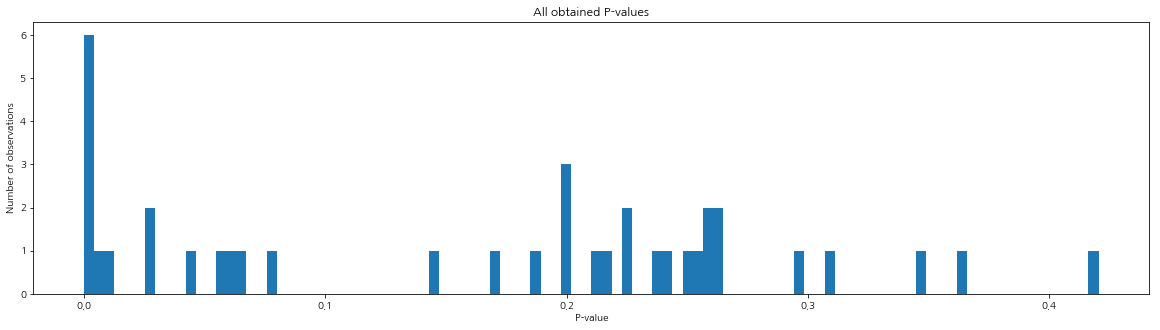

In [12]:
# Visualize the P-values
def plot_pvalues():
    """
    This function plots all obtained P-values.
    """
    plt.figure(figsize=(20, 5))
    plt.hist(data_analysis['P-Value'], bins=100)
    plt.xlabel('P-value')
    plt.ylabel('Number of observations')
    plt.title('All obtained P-values')
    plt.show()

plot_pvalues()

In [13]:
# Show Top 10 and Bottom 10
display(data_analysis.sort_values('P-Value')[:10])
display(data_analysis.sort_values('P-Value')[-10:])

,Constant,Gamma,Alpha,P-Value
Pairs,,,,
"(KODEX 200선물인버스2X, NH투자증권)",20.8107,-1.3694,-0.0046,0.0000
"(KODEX 200선물인버스2X, KODEX 레버리지)",18.6440,-1.0742,-0.1870,0.0000
"(KODEX 200선물인버스2X, 삼성전자)",23.7028,-1.4049,-0.0062,0.0000
"(KODEX 200선물인버스2X, KODEX 200)",29.7662,-2.0722,-0.3239,0.0000
"(KODEX 200선물인버스2X, SK하이닉스)",15.7066,-0.6629,-0.0058,0.0002
"(KODEX 200선물인버스2X, 현대제철)",13.8620,-0.5572,-0.0059,0.0033
"(KODEX 200선물인버스2X, 두산중공업)",1.4241,0.6847,-0.0032,0.0076
"(KODEX 200선물인버스2X, 삼성전자우)",18.7221,-0.9660,-0.0031,0.0089
"(KODEX 200선물인버스2X, 우리금융지주)",-4.8824,1.3968,-0.0010,0.0275


,Constant,Gamma,Alpha,P-Value
Pairs,,,,
"(KODEX 200선물인버스2X, 미래에셋대우)",4.7927,0.3479,-0.0009,0.2553
"(KODEX 200선물인버스2X, 팬오션)",7.8078,0.0222,-0.0009,0.2566
"(KODEX 200선물인버스2X, 동화약품)",8.3496,-0.0361,-0.0009,0.2599
"(KODEX 200선물인버스2X, LG유플러스)",2.4396,0.5922,-0.0010,0.2628
"(KODEX 200선물인버스2X, SK증권)",12.0711,-0.6071,-0.0009,0.2640
"(KODEX 200선물인버스2X, DB하이텍)",6.2447,0.1667,-0.0010,0.2963
"(KODEX 200선물인버스2X, HMM)",10.4269,-0.2564,-0.0009,0.3095
"(KODEX 200선물인버스2X, KB금융)",0.3636,0.7103,-0.0009,0.3486
"(KODEX 200선물인버스2X, 삼부토건)",5.7961,0.2594,-0.0010,0.3637


In [80]:
# Selecting tradable pairs where P-Value < 0.01 and create a seperate DataFrame containing these pairs
tradable_pairs_analysis = data_analysis[data_analysis['P-Value'] < 0.01].sort_values('P-Value')

tradable_pairs_analysis

,Constant,Gamma,Alpha,P-Value
Pairs,,,,
"(KODEX 200선물인버스2X, 삼성전자)",23.7028,-1.4049,-0.0062,0.0000
"(KODEX 200선물인버스2X, NH투자증권)",20.8107,-1.3694,-0.0046,0.0000
"(KODEX 200선물인버스2X, KODEX 200)",29.7662,-2.0722,-0.3239,0.0000
"(KODEX 200선물인버스2X, SK하이닉스)",15.7066,-0.6629,-0.0058,0.0002
"(KODEX 200선물인버스2X, 현대제철)",13.8620,-0.5572,-0.0059,0.0033
"(KODEX 200선물인버스2X, 두산중공업)",1.4241,0.6847,-0.0032,0.0076
"(KODEX 200선물인버스2X, 삼성전자우)",18.7221,-0.9660,-0.0031,0.0089


In [81]:
# Get all the tradable stock pairs into a list
stock_pairs = list(tradable_pairs_analysis.index.values.tolist())

# Show the Pairs
stock_pairs

[('KODEX 200선물인버스2X', '삼성전자'),
 ('KODEX 200선물인버스2X', 'NH투자증권'),
 ('KODEX 200선물인버스2X', 'KODEX 200'),
 ('KODEX 200선물인버스2X', 'SK하이닉스'),
 ('KODEX 200선물인버스2X', '현대제철'),
 ('KODEX 200선물인버스2X', '두산중공업'),
 ('KODEX 200선물인버스2X', '삼성전자우')]

### --------------------------------------------------------------------------------------------------------------------------------------------------------






# 알고리듬

In [82]:
# Create a list of unique tradable stocks
list_stock1 = [stock[0] for stock in stock_pairs]
list_stock2 = [stock[1] for stock in stock_pairs]

for stock in list_stock2:
    list_stock1.append(stock)
    
unique_stock_list = list(set(list_stock1))

# Create a new DataFrame containing all market information for the tradable pairs
tradable_pairs_data = market_data[unique_stock_list]
tradable_pairs_data.head()

,KODEX 200,두산중공업,NH투자증권,삼성전자,SK하이닉스,현대제철,삼성전자우,KODEX 200선물인버스2X
time,,,,,,,,
20201127.1214,10.465956,9.708081,9.319195,11.125791,11.496796,10.405777,11.030039,8.078688
20201127.1215,10.465671,9.708081,9.319195,11.125791,11.496796,10.407289,11.030039,8.078688
20201127.1216,10.465671,9.705037,9.314700,11.125791,11.498827,10.407289,11.031659,8.078688
20201127.1217,10.465671,9.708081,9.314700,11.125791,11.497812,10.405777,11.031659,8.080237
20201127.1218,10.465101,9.708081,9.314700,11.125791,11.496796,10.405777,11.030039,8.080237


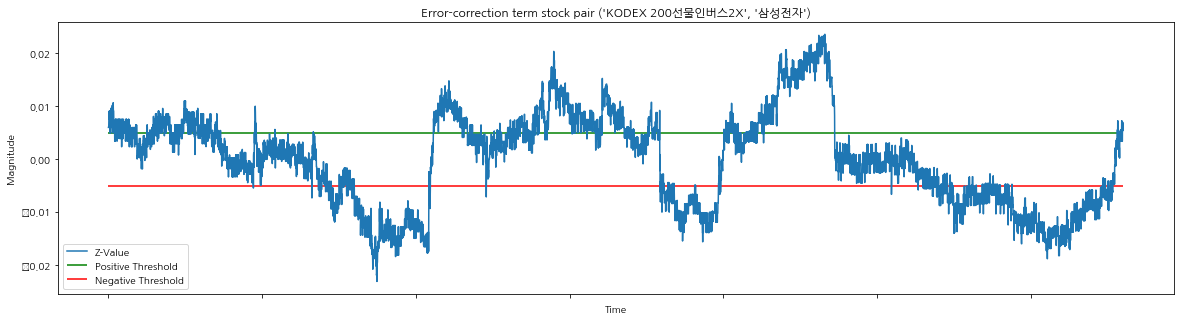

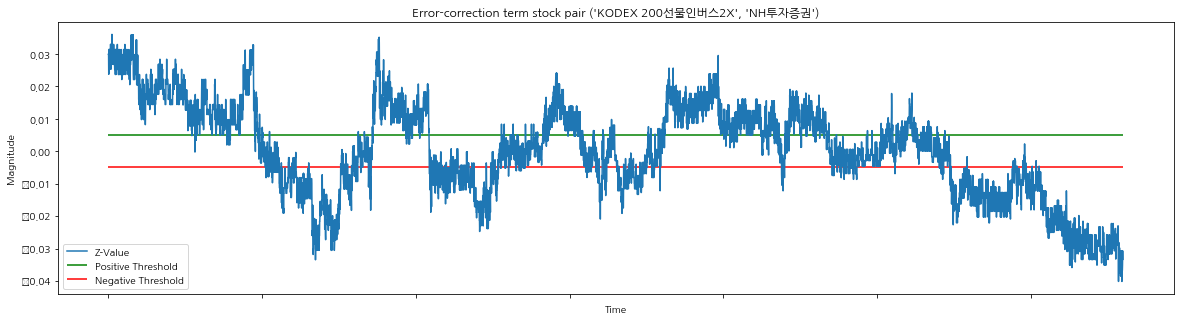

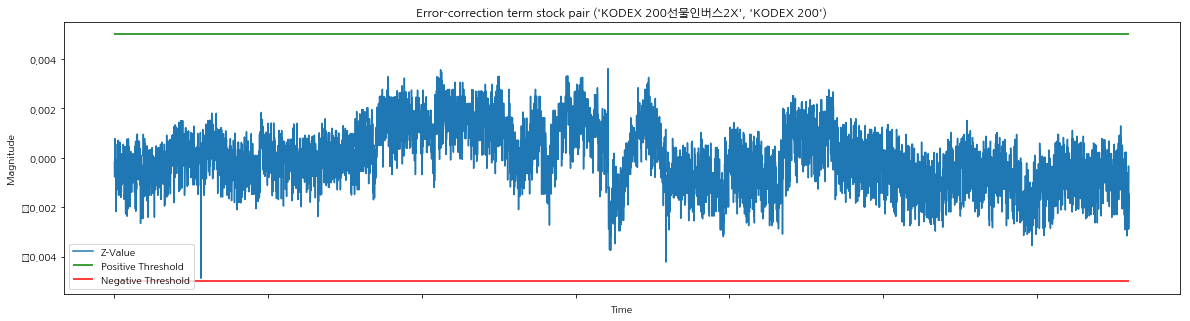

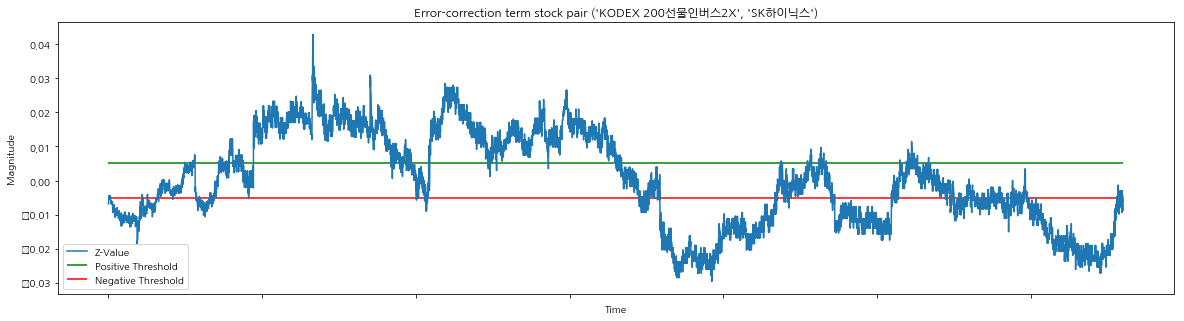

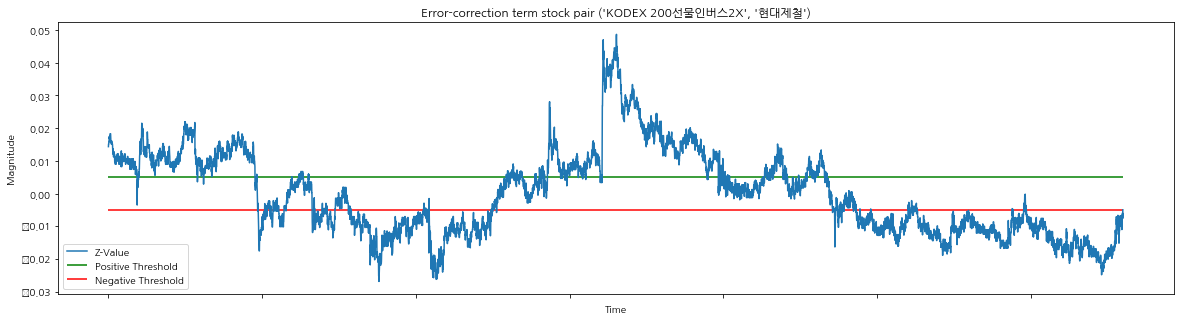

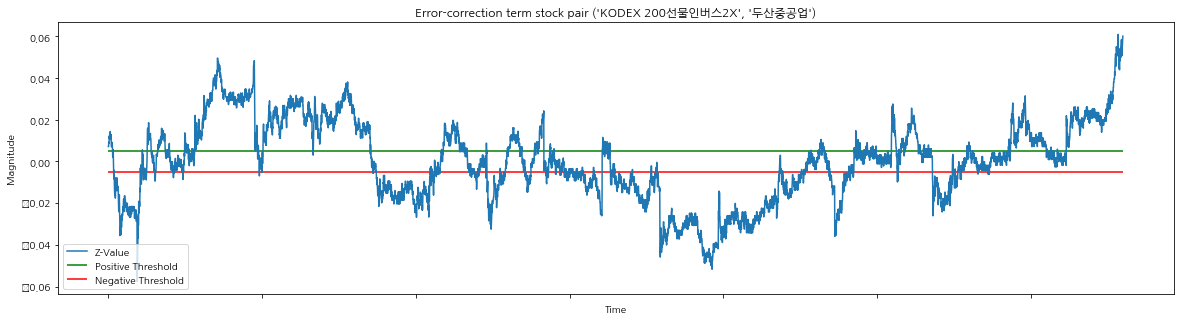

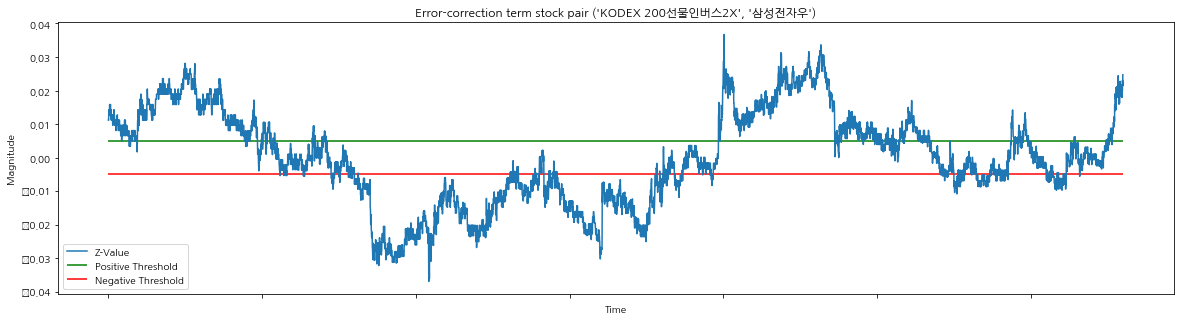

In [83]:
def Plot_Tradable_Z():
    """
    This function plots the z-values of all pairs based on
    the data_zvalues dataframe.
    """
    for pair in stock_pairs: 
        zvalue = data_zvalues[pair]
        plt.figure(figsize=(20,5))
        plt.title('Error-correction term stock pair {}'.format(pair))
        zvalue.plot()
        plt.xlabel('Time')
        plt.ylabel('Magnitude')
        
        xmin = 0
        xmax = len(zvalue)
        plt.hlines(0.005, xmin, xmax, 'g') # Note 0.005 is randomly chosen
        plt.hlines(-0.005, xmin, xmax, 'r') # Note -0.005 is randomly chosen
        
        plt.legend(['Z-Value', 'Positive Threshold', 'Negative Threshold'], loc='lower left')
        
        plt.show()
        
Plot_Tradable_Z()

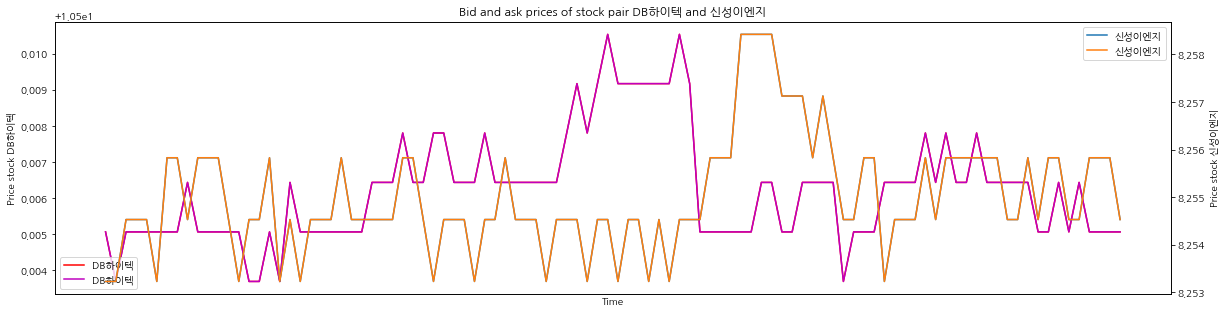

In [59]:
# Select randomly chosen pair from the tradable stock and visualize bid and ask prices, bid and ask volumes, and the z-values
import random

# Choose random stock
random_pair = random.choice(stock_pairs)

# Create a plot showing the bid and ask prices of a randomly chosen stock
def Plot_RandomPair_BidAskPrices():
    """
    This function plots the bid and ask price of a randomly chosen tradable pair.
    """
    plt.figure(figsize=(20,5))
    plt.title('Bid and ask prices of stock pair {} and {}'.format(random_pair[0], random_pair[1]))
    
    plt.plot(tradable_pairs_data[random_pair[0] ].iloc[:100], 'r')
    plt.plot(tradable_pairs_data[random_pair[0] ].iloc[:100], 'm')
    plt.xlabel('Time')
    plt.ylabel('Price stock {}'.format(random_pair[0]))
    plt.legend(loc='lower left')
    
    plt.twinx()
    plt.plot(tradable_pairs_data[random_pair[1] ].iloc[:100])
    plt.plot(tradable_pairs_data[random_pair[1]].iloc[:100])
    plt.xticks([])
    plt.ylabel('Price stock {}'.format(random_pair[1]))
    plt.legend(loc='upper right')
    
    plt.show()

Plot_RandomPair_BidAskPrices()

In [84]:
# Create a Dataframe containing information about the error-correction term of each pair
data_error_correction_term = {'Pair': [],
                              'CountZeroCrossings': [],
                              'TradingPeriod': [],
                              'LongRunMean': [],
                              'Std': []}

for pair in stock_pairs:
    zvalue = data_zvalues[pair]
    my_array = np.array(zvalue)
    count = ((my_array[:-1] * my_array[1:]) < 0).sum()
    trading_period = 1 / count
    long_run_mean = zvalue.mean()
    std = zvalue.std()

    data_error_correction_term['Pair'].append(pair)
    data_error_correction_term['CountZeroCrossings'].append(count)
    data_error_correction_term['TradingPeriod'].append(trading_period)
    data_error_correction_term['LongRunMean'].append(round(long_run_mean, 4))
    data_error_correction_term['Std'].append(round(std, 4))

data_error_correction_term = pd.DataFrame(data_error_correction_term).set_index('Pair')

data_error_correction_term

,CountZeroCrossings,TradingPeriod,LongRunMean,Std
Pair,,,,
"(KODEX 200선물인버스2X, 삼성전자)",388,0.002577,-0.0,0.0087
"(KODEX 200선물인버스2X, NH투자증권)",455,0.002198,0.0,0.0143
"(KODEX 200선물인버스2X, KODEX 200)",1950,0.000513,-0.0,0.0012
"(KODEX 200선물인버스2X, SK하이닉스)",306,0.003268,0.0,0.0134
"(KODEX 200선물인버스2X, 현대제철)",153,0.006536,-0.0,0.0127
"(KODEX 200선물인버스2X, 두산중공업)",288,0.003472,0.0,0.0190
"(KODEX 200선물인버스2X, 삼성전자우)",252,0.003968,-0.0,0.0138


## Threshold Analysis for All Stock Pairs

In [85]:
# Create a new column within the earlier defined DataFrame with Z-Values of all stock pairs
for pair in stock_pairs:
    stock1 = pair[0]
    stock2 = pair[1]
    
    tradable_pairs_data[stock1+stock2, 'Z-Value'] = data_zvalues[stock1,stock2]
tradable_pairs_data

C:\Users\chhch\anaconda3\envs\py36_32\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,KODEX 200,두산중공업,NH투자증권,삼성전자,SK하이닉스,현대제철,삼성전자우,KODEX 200선물인버스2X,"(KODEX 200선물인버스2X삼성전자, Z-Value)","(KODEX 200선물인버스2XNH투자증권, Z-Value)","(KODEX 200선물인버스2XKODEX 200, Z-Value)","(KODEX 200선물인버스2XSK하이닉스, Z-Value)","(KODEX 200선물인버스2X현대제철, Z-Value)","(KODEX 200선물인버스2X두산중공업, Z-Value)","(KODEX 200선물인버스2X삼성전자우, Z-Value)"
time,,,,,,,,,,,,,,,
20201127.1214,10.465956,9.708081,9.319195,11.125791,11.496796,10.405777,11.030039,8.078688,0.005979,0.029776,-0.000178,-0.006820,0.014322,0.007117,0.011174
20201127.1215,10.465671,9.708081,9.319195,11.125791,11.496796,10.407289,11.030039,8.078688,0.005979,0.029776,-0.000769,-0.006820,0.015165,0.007117,0.011174
20201127.1216,10.465671,9.705037,9.314700,11.125791,11.498827,10.407289,11.031659,8.078688,0.005979,0.023621,-0.000769,-0.005474,0.015165,0.009201,0.012738
20201127.1217,10.465671,9.708081,9.314700,11.125791,11.497812,10.405777,11.031659,8.080237,0.007528,0.025171,0.000781,-0.004597,0.015872,0.008666,0.014288
20201127.1218,10.465101,9.708081,9.314700,11.125791,11.496796,10.405777,11.030039,8.080237,0.007528,0.025171,-0.000401,-0.005270,0.015872,0.008666,0.012723
20201127.1219,10.464959,9.705037,9.319195,11.125791,11.496796,10.407289,11.031659,8.080237,0.007528,0.031325,-0.000696,-0.005270,0.016714,0.010750,0.014288
20201127.1220,10.464531,9.705037,9.314700,11.125791,11.495779,10.405777,11.030039,8.081784,0.009074,0.026717,-0.000036,-0.004398,0.017418,0.012297,0.014270
20201127.1221,10.465101,9.705037,9.314700,11.125791,11.496796,10.407289,11.030039,8.080237,0.007528,0.025171,-0.000401,-0.005270,0.016714,0.010750,0.012723
20201127.1222,10.464816,9.705037,9.314700,11.125791,11.495779,10.405777,11.031659,8.081784,0.009074,0.026717,0.000555,-0.004398,0.017418,0.012297,0.015834


In [86]:
# Create a Dictionary that saves all Gamma values of each pair
gamma_dictionary = {}

for pair, value in tradable_pairs_analysis.iterrows():
    gamma_dictionary[pair]= value['Gamma']
    
gamma_dictionary

{('KODEX 200선물인버스2X', '삼성전자'): -1.4049,
 ('KODEX 200선물인버스2X', 'NH투자증권'): -1.3694,
 ('KODEX 200선물인버스2X', 'KODEX 200'): -2.0722,
 ('KODEX 200선물인버스2X', 'SK하이닉스'): -0.6629,
 ('KODEX 200선물인버스2X', '현대제철'): -0.5572,
 ('KODEX 200선물인버스2X', '두산중공업'): 0.6847,
 ('KODEX 200선물인버스2X', '삼성전자우'): -0.966}

In [87]:
# Create a Dictionary that saves all Standard Deviation values of each pair
std_dictionary = {}

for pair, value in data_error_correction_term.iterrows():
    std_dictionary[pair]= value['Std']
    
std_dictionary

{('KODEX 200선물인버스2X', '삼성전자'): 0.0087,
 ('KODEX 200선물인버스2X', 'NH투자증권'): 0.0143,
 ('KODEX 200선물인버스2X', 'KODEX 200'): 0.0012,
 ('KODEX 200선물인버스2X', 'SK하이닉스'): 0.0134,
 ('KODEX 200선물인버스2X', '현대제철'): 0.0127,
 ('KODEX 200선물인버스2X', '두산중공업'): 0.019,
 ('KODEX 200선물인버스2X', '삼성전자우'): 0.0138}

In [89]:
positions = {}
limit = 100

j= 0
for pair in stock_pairs:
    stock1 = pair[0]
    stock2 = pair[1]
    
    gamma = gamma_dictionary[stock1,stock2]
        
    for i in np.linspace(0.05, 1.0, 10):
        threshold = i * std_dictionary[stock1,stock2]
        
        current_position_stock1 = 0 
        current_position_stock2 = 0 
        
        column_name_stock1 = stock1 + ' Pos - Thres: ' + str(threshold)
        
        positions[column_name_stock1] = []

        for time, data_at_time in tradable_pairs_data.iterrows():            
            
            Price_Stock1 = data_at_time[stock1]
            Price_Stock2 = data_at_time[stock2]
        
            zvalue = data_at_time[stock1+stock2,'Z-Value']

            # If the zvalues of (BB,DD) are high the spread diverges, i.e. sell BB (=stock1=y) and buy DD (=stock2=x)
            if zvalue >= threshold:
                
                hedge_ratio = gamma * (Price_Stock1 / Price_Stock2)

                if hedge_ratio >= 1:

                    max_order_stock1 = current_position_stock1 + limit
                    max_order_stock2 = max_order_stock1 / hedge_ratio
                    
                    trade = np.floor(min(max_order_stock1, max_order_stock2))

                    positions[column_name_stock1].append((- trade * hedge_ratio) + current_position_stock1)

                    current_position_stock1 = ((- trade * hedge_ratio) + current_position_stock1)

                elif hedge_ratio < 1:

                    max_order_stock1 = current_position_stock1 + limit
                    max_order_stock2 = max_order_stock1 * hedge_ratio
                    
                    trade = np.floor(min(max_order_stock1, max_order_stock2))

                    positions[column_name_stock1].append((- trade / hedge_ratio) + current_position_stock1)

                    current_position_stock1 = ((- trade / hedge_ratio) + current_position_stock1)

            elif zvalue <= -threshold:
                hedge_ratio = gamma * (Price_Stock1 / Price_Stock2)
                
                if hedge_ratio >= 1:

                    max_order_stock1 = abs(current_position_stock1 - limit)
                    max_order_stock2 = max_order_stock1 / hedge_ratio
                    
                    trade = np.floor(min(max_order_stock1, max_order_stock2))

                    positions[column_name_stock1].append((+ trade * hedge_ratio) + current_position_stock1)

                    current_position_stock1 = (+ trade * hedge_ratio) + current_position_stock1
                    
                elif hedge_ratio < 1:
                    
                    max_order_stock1 = abs(current_position_stock1 - limit)
                    max_order_stock2 = max_order_stock1 * hedge_ratio
                    
                    trade = np.floor(min(max_order_stock1, max_order_stock2))

                    positions[column_name_stock1].append((+ trade / hedge_ratio) + current_position_stock1)

                    current_position_stock1 = (+ trade / hedge_ratio) + current_position_stock1  
                    
                Price_Stock1 = data_at_time[stock1]
                Price_Stock2 = data_at_time[stock2]

            else:
                    positions[column_name_stock1].append(current_position_stock1)
                    
        column_name_stock2 = stock2 + ' Pos - Thres: ' + str(threshold)
        
        if hedge_ratio >= 1:
            positions[column_name_stock2] = positions[column_name_stock1] / hedge_ratio * -1
            
        elif hedge_ratio < 1:
            positions[column_name_stock2] = positions[column_name_stock1] / (1 / hedge_ratio) * -1
    j+=1 ;print(j)

C:\Users\chhch\anaconda3\envs\py36_32\lib\site-packages\ipykernel_launcher.py:76: RuntimeWarning: overflow encountered in double_scalars
C:\Users\chhch\anaconda3\envs\py36_32\lib\site-packages\ipykernel_launcher.py:78: RuntimeWarning: overflow encountered in double_scalars
C:\Users\chhch\anaconda3\envs\py36_32\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\chhch\anaconda3\envs\py36_32\lib\site-packages\ipykernel_launcher.py:53: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\chhch\anaconda3\envs\py36_32\lib\site-packages\ipykernel_launcher.py:92: RuntimeWarning: overflow encountered in true_divide
C:\Users\chhch\anaconda3\envs\py36_32\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: overflow encountered in double_scalars
C:\Users\chhch\anaconda3\envs\py36_32\lib\site-packages\ipykernel_launcher.py:53: RuntimeWarning: overflow encountered in double_scalars
C:\Users\chhch\anaconda3\envs\py36

1


C:\Users\chhch\anaconda3\envs\py36_32\lib\site-packages\ipykernel_launcher.py:72: RuntimeWarning: overflow encountered in double_scalars


2
3
4
5
6
7


In [90]:
# Create a seperate dataframe (to keep the original dataframe intact) with rounding
# Also insert the timestamp, as found in the tradeable_pairs_data DataFrame
positions_final = np.ceil(pd.DataFrame(positions))
positions_final['Timestamp'] = tradable_pairs_data.index
positions_final = positions_final.set_index('Timestamp')
positions_final

,KODEX 200선물인버스2X Pos - Thres: 0.000435,삼성전자 Pos - Thres: 0.000435,KODEX 200선물인버스2X Pos - Thres: 0.0013533333333333333,삼성전자 Pos - Thres: 0.0013533333333333333,KODEX 200선물인버스2X Pos - Thres: 0.0022716666666666666,삼성전자 Pos - Thres: 0.0022716666666666666,KODEX 200선물인버스2X Pos - Thres: 0.0031899999999999997,삼성전자 Pos - Thres: 0.0031899999999999997,KODEX 200선물인버스2X Pos - Thres: 0.004108333333333333,삼성전자 Pos - Thres: 0.004108333333333333,...,KODEX 200선물인버스2X Pos - Thres: 0.007973333333333334,삼성전자우 Pos - Thres: 0.007973333333333334,KODEX 200선물인버스2X Pos - Thres: 0.009430000000000001,삼성전자우 Pos - Thres: 0.009430000000000001,KODEX 200선물인버스2X Pos - Thres: 0.010886666666666668,삼성전자우 Pos - Thres: 0.010886666666666668,KODEX 200선물인버스2X Pos - Thres: 0.012343333333333333,삼성전자우 Pos - Thres: 0.012343333333333333,KODEX 200선물인버스2X Pos - Thres: 0.0138,삼성전자우 Pos - Thres: 0.0138
Timestamp,,,,,,,,,,,,,,,,,,,,,
20201127.1214,-100.0,-101.0,-100.0,-101.0,-100.0,-101.0,-100.0,-101.0,-100.0,-101.0,...,-1.000000e+02,-6.900000e+01,-1.000000e+02,-6.900000e+01,-1.000000e+02,-6.900000e+01,0.0,0.0,0.0,0.0
20201127.1215,-101.0,-102.0,-101.0,-102.0,-101.0,-102.0,-101.0,-102.0,-101.0,-102.0,...,-1.010000e+02,-7.000000e+01,-1.010000e+02,-7.000000e+01,-1.010000e+02,-7.000000e+01,0.0,0.0,0.0,0.0
20201127.1216,-103.0,-104.0,-103.0,-104.0,-103.0,-104.0,-103.0,-104.0,-103.0,-104.0,...,-1.040000e+02,-7.200000e+01,-1.040000e+02,-7.200000e+01,-1.040000e+02,-7.200000e+01,-100.0,-69.0,0.0,0.0
20201127.1217,-107.0,-108.0,-107.0,-108.0,-107.0,-108.0,-107.0,-108.0,-107.0,-108.0,...,-1.110000e+02,-7.700000e+01,-1.110000e+02,-7.700000e+01,-1.110000e+02,-7.700000e+01,-101.0,-70.0,-100.0,-69.0
20201127.1218,-115.0,-116.0,-115.0,-116.0,-115.0,-116.0,-115.0,-116.0,-115.0,-116.0,...,-1.280000e+02,-8.900000e+01,-1.280000e+02,-8.900000e+01,-1.280000e+02,-8.900000e+01,-104.0,-72.0,-100.0,-69.0
20201127.1219,-131.0,-131.0,-131.0,-131.0,-131.0,-131.0,-131.0,-131.0,-131.0,-131.0,...,-1.690000e+02,-1.170000e+02,-1.690000e+02,-1.170000e+02,-1.690000e+02,-1.170000e+02,-111.0,-77.0,-101.0,-70.0
20201127.1220,-162.0,-163.0,-162.0,-163.0,-162.0,-163.0,-162.0,-163.0,-162.0,-163.0,...,-2.680000e+02,-1.860000e+02,-2.680000e+02,-1.860000e+02,-2.680000e+02,-1.860000e+02,-128.0,-89.0,-104.0,-72.0
20201127.1221,-224.0,-225.0,-224.0,-225.0,-224.0,-225.0,-224.0,-225.0,-224.0,-225.0,...,-5.070000e+02,-3.510000e+02,-5.070000e+02,-3.510000e+02,-5.070000e+02,-3.510000e+02,-169.0,-117.0,-104.0,-72.0
20201127.1222,-346.0,-348.0,-346.0,-348.0,-346.0,-348.0,-346.0,-348.0,-346.0,-348.0,...,-1.083000e+03,-7.510000e+02,-1.083000e+03,-7.510000e+02,-1.083000e+03,-7.510000e+02,-268.0,-186.0,-111.0,-77.0


In [92]:
# The difference between the positions
positions_diff = positions_final.diff()[1:]

# Positions_diff first rows
positions_diff

# OPTIONAL to Excel to Save the Amount of Trades
# positions_diff[(positions_diff != 0)].count().to_excel('Thresholds.xlsx')

,KODEX 200선물인버스2X Pos - Thres: 0.000435,삼성전자 Pos - Thres: 0.000435,KODEX 200선물인버스2X Pos - Thres: 0.0013533333333333333,삼성전자 Pos - Thres: 0.0013533333333333333,KODEX 200선물인버스2X Pos - Thres: 0.0022716666666666666,삼성전자 Pos - Thres: 0.0022716666666666666,KODEX 200선물인버스2X Pos - Thres: 0.0031899999999999997,삼성전자 Pos - Thres: 0.0031899999999999997,KODEX 200선물인버스2X Pos - Thres: 0.004108333333333333,삼성전자 Pos - Thres: 0.004108333333333333,...,KODEX 200선물인버스2X Pos - Thres: 0.007973333333333334,삼성전자우 Pos - Thres: 0.007973333333333334,KODEX 200선물인버스2X Pos - Thres: 0.009430000000000001,삼성전자우 Pos - Thres: 0.009430000000000001,KODEX 200선물인버스2X Pos - Thres: 0.010886666666666668,삼성전자우 Pos - Thres: 0.010886666666666668,KODEX 200선물인버스2X Pos - Thres: 0.012343333333333333,삼성전자우 Pos - Thres: 0.012343333333333333,KODEX 200선물인버스2X Pos - Thres: 0.0138,삼성전자우 Pos - Thres: 0.0138
Timestamp,,,,,,,,,,,,,,,,,,,,,
20201127.1215,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,0.0,0.0,0.0,0.0
20201127.1216,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,-3.000000e+00,-2.000000e+00,-3.000000e+00,-2.000000e+00,-3.000000e+00,-2.000000e+00,-100.0,-69.0,0.0,0.0
20201127.1217,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,...,-7.000000e+00,-5.000000e+00,-7.000000e+00,-5.000000e+00,-7.000000e+00,-5.000000e+00,-1.0,-1.0,-100.0,-69.0
20201127.1218,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,...,-1.700000e+01,-1.200000e+01,-1.700000e+01,-1.200000e+01,-1.700000e+01,-1.200000e+01,-3.0,-2.0,0.0,0.0
20201127.1219,-16.0,-15.0,-16.0,-15.0,-16.0,-15.0,-16.0,-15.0,-16.0,-15.0,...,-4.100000e+01,-2.800000e+01,-4.100000e+01,-2.800000e+01,-4.100000e+01,-2.800000e+01,-7.0,-5.0,-1.0,-1.0
20201127.1220,-31.0,-32.0,-31.0,-32.0,-31.0,-32.0,-31.0,-32.0,-31.0,-32.0,...,-9.900000e+01,-6.900000e+01,-9.900000e+01,-6.900000e+01,-9.900000e+01,-6.900000e+01,-17.0,-12.0,-3.0,-2.0
20201127.1221,-62.0,-62.0,-62.0,-62.0,-62.0,-62.0,-62.0,-62.0,-62.0,-62.0,...,-2.390000e+02,-1.650000e+02,-2.390000e+02,-1.650000e+02,-2.390000e+02,-1.650000e+02,-41.0,-28.0,0.0,0.0
20201127.1222,-122.0,-123.0,-122.0,-123.0,-122.0,-123.0,-122.0,-123.0,-122.0,-123.0,...,-5.760000e+02,-4.000000e+02,-5.760000e+02,-4.000000e+02,-5.760000e+02,-4.000000e+02,-99.0,-69.0,-7.0,-5.0
20201127.1223,-243.0,-243.0,-243.0,-243.0,-243.0,-243.0,-243.0,-243.0,-243.0,-243.0,...,-1.391000e+03,-9.640000e+02,-1.391000e+03,-9.640000e+02,-1.391000e+03,-9.640000e+02,-239.0,-165.0,0.0,0.0


In [234]:
positions_diff[-1:] = -positions_final[-1:]

In [235]:
pnl_dataframe = pd.DataFrame()

for pair in stock_pairs:
    stock1 = pair[0]
    stock2 = pair[1]

    Stock1_Price = tradable_pairs_data[stock1][1:]
    Stock2_Price = tradable_pairs_data[stock2][1:]

    for i in np.linspace(0.05, 1.0, 10):
        threshold = i * std_dictionary[stock1, stock2]

        column_name_1 = stock1 + ' Pos - Thres: ' + str(threshold)
        column_name_2 = stock2 + ' Pos - Thres: ' + str(threshold)

        pnl_dataframe[stock1 + str(threshold)] = np.where(positions_diff[column_name_1] > 0,
                                                          positions_diff[column_name_1] * -Stock1_Price, positions_diff[column_name_1] * -Stock1_Price)
        pnl_dataframe[stock2 + str(threshold)] = np.where(positions_diff[column_name_2] > 0,
                                                          positions_diff[column_name_2] * -Stock2_Price, positions_diff[column_name_2] * -Stock2_Price)

pnl_dataframe.head()

,KODEX 200선물인버스2X0.000435,삼성전자0.000435,KODEX 200선물인버스2X0.0013533333333333333,삼성전자0.0013533333333333333,KODEX 200선물인버스2X0.0022716666666666666,삼성전자0.0022716666666666666,KODEX 200선물인버스2X0.0031899999999999997,삼성전자0.0031899999999999997,KODEX 200선물인버스2X0.004108333333333333,삼성전자0.004108333333333333,...,KODEX 200선물인버스2X0.007337777777777778,현대제철0.007337777777777778,KODEX 200선물인버스2X0.008678333333333333,현대제철0.008678333333333333,KODEX 200선물인버스2X0.01001888888888889,현대제철0.01001888888888889,KODEX 200선물인버스2X0.011359444444444445,현대제철0.011359444444444445,KODEX 200선물인버스2X0.0127,현대제철0.0127
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [236]:
# Create Columns for the pnl_threshold dataframe
pairs = []
thresholds = []

for pair in stock_pairs:
    stock1 = pair[0]
    stock2 = pair[1]

    for i in np.linspace(0.05, 1.0, 10):
        threshold = i * std_dictionary[stock1, stock2]
        pair = stock1, stock2
        pairs.append(pair)
        thresholds.append(threshold)

In [237]:
# Include columns and append PnLs
pnl_threshold = {'Pairs' : pairs,
                 'Thresholds': thresholds,
                 'PnLs' : []}

for pair in stock_pairs:
    stock1 = pair[0]
    stock2 = pair[1]
    
    for i in np.linspace(0.05, 1.0, 10):
        threshold = i * std_dictionary[stock1,stock2]
        pnl_threshold['PnLs'].append(pnl_dataframe[stock1 + str(threshold)].sum() + pnl_dataframe[stock2 + str(threshold)].sum())
        
pnl_threshold = pd.DataFrame(pnl_threshold)
pnl_threshold = pnl_threshold.set_index('Pairs')
# pnl_threshold.to_excel('Thresholds.xlsx')

In [238]:
# Find Highest PnLs
highest_pnls = pnl_threshold.groupby(by='Pairs').agg({'PnLs' : max})
highest_pnls.sort_values('PnLs', ascending=False)

,PnLs
Pairs,
"(KODEX 200선물인버스2X, SK하이닉스)",inf
"(KODEX 200선물인버스2X, 삼성전자)",inf
"(KODEX 200선물인버스2X, 삼성전자우)",inf
"(KODEX 200선물인버스2X, 현대제철)",inf
"(KODEX 200선물인버스2X, NH투자증권)",1.145506e+307
"(KODEX 200선물인버스2X, KODEX 레버리지)",5.390222e+285
"(KODEX 200선물인버스2X, KODEX 200)",6.627232e+98
"(KODEX 200선물인버스2X, 두산중공업)",3.286073e+01


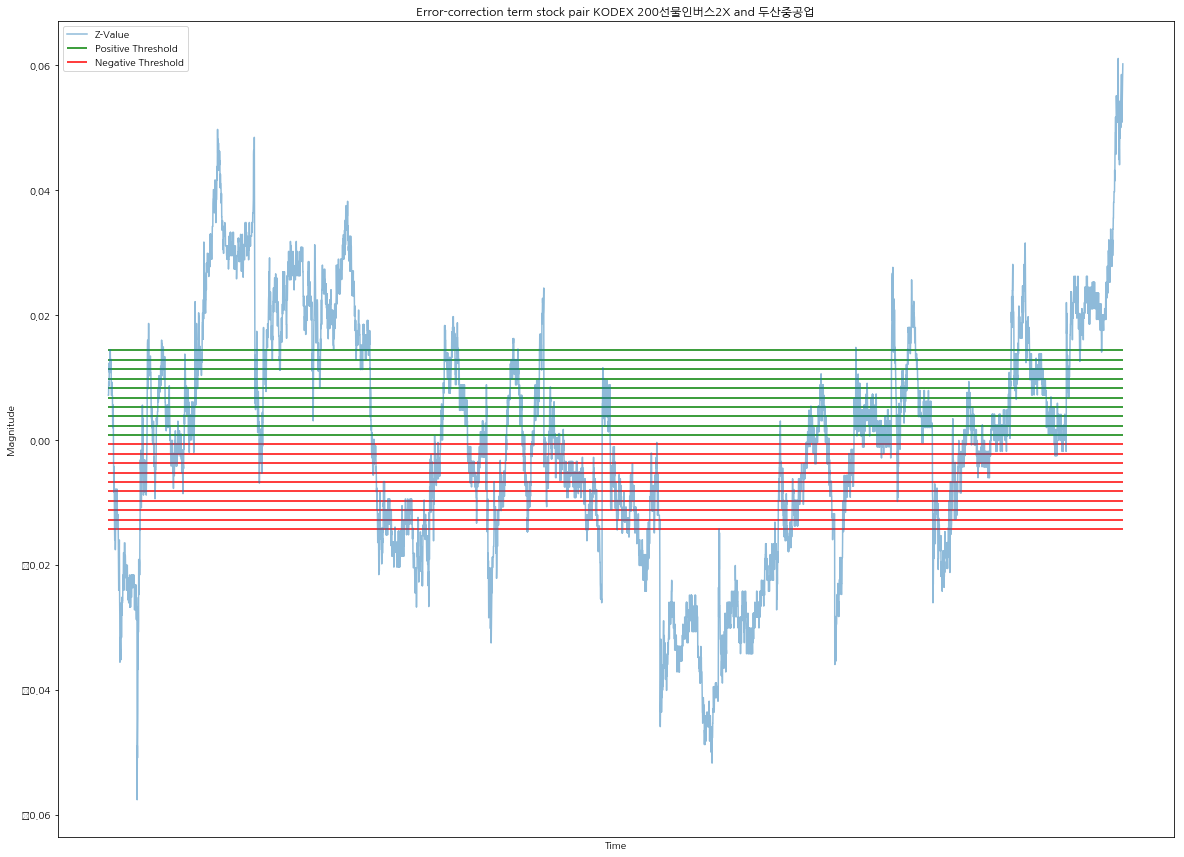

In [239]:
# Plot error-correction term (z-value) to observe what the spread looks like (see slide for comparison plot cointegrated pair)
def Plot_Thresholds(stock1, stock2):
    zvalue = tradable_pairs_data[stock1+stock2,'Z-Value']
    plt.figure(figsize=(20,15))
    plt.xticks([])
    plt.title('Error-correction term stock pair ' + stock1 + ' and ' + stock2)
    zvalue.plot(alpha=0.5)
    plt.xlabel('Time')
    plt.ylabel('Magnitude')
    xmin = 0
    xmax = len(zvalue)
    
    # Boundries chosen to give an approximate good fit
    plt.hlines(pnl_threshold['Thresholds'][10:20], xmin, xmax, 'g')  
    plt.hlines(-pnl_threshold['Thresholds'][10:20], xmin, xmax, 'r')
    
    plt.legend(['Z-Value', 'Positive Threshold', 'Negative Threshold'])
    plt.show()
        
Plot_Thresholds('KODEX 200선물인버스2X', '두산중공업')

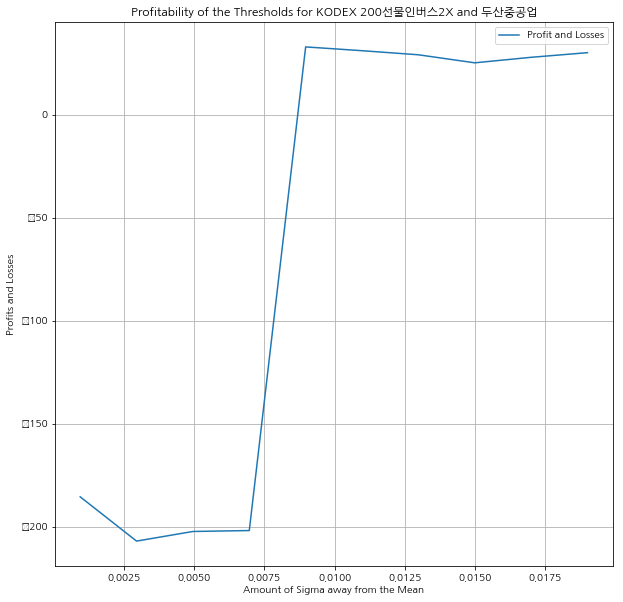

In [240]:
# Create a Plot that displays the Profitability of the Thresholds

def profitability_of_the_thresholds(stock1, stock2):
    pnl_threshold[(pnl_threshold.index == (stock1, stock2))].plot(x='Thresholds', y='PnLs', figsize=(10,10))
    plt.title('Profitability of the Thresholds for ' + stock1 + ' and ' + stock2)
    plt.xlabel('Amount of Sigma away from the Mean')
    plt.ylabel('Profits and Losses')
    plt.legend(['Profit and Losses'])
    plt.grid()

profitability_of_the_thresholds('KODEX 200선물인버스2X', '두산중공업')